In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from numpy.lib.stride_tricks import as_strided
import PIL
from pandas import DataFrame
import pandas as pd
from IPython.display import display, HTML
from skimage.exposure import rescale_intensity
import json
import os
from itertools import product
import itertools
import random
import glob
from pathlib import Path
from datetime import datetime
import datetime
from matplotlib.colors import Normalize


def set_axis(x, no_labels = 7)->tuple[np.array, np.array]:
    """Sets the x-axis positions and labels for a plot.

    Args:
        x (np.array): The x-axis data.
        no_labels (int, optional): The number of labels to display. Defaults to 7.

    Returns:
        tuple[np.array, np.array]: A tuple containing:
            - The positions of the labels on the x-axis.
            - The labels themselves.
    """
    nx = x.shape[0]
    step_x = int(nx / (no_labels - 1)) 
    x_positions = np.arange(0,nx,step_x) 
    x_labels = x[::step_x]
    return x_positions, x_labels

pd.options.display.html.border = 0
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
if "google.colab" in str(get_ipython()):
    from google.colab.patches import cv2_imshow

    imshow = cv2_imshow
else:

    def imshow(img):
        img = img.clip(0, 255).astype("uint8")
        if img.ndim == 3:
            if img.shape[2] == 4:
                img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
            else:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        display(PIL.Image.fromarray(img))

In [3]:
def h_color(a, interpolation=None, size=None, fy=1.5, fx=1.5, cmap="gray"):
    s = [int(a.shape[0] * fy), int(a.shape[1] * fx)] if size is None else size
    plt.figure(figsize=s)
    plt.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        labelleft=False,
        left=False,
        right=False,
    )
    plt.imshow(a, cmap=cmap, interpolation=interpolation)

In [4]:
css = """
<style type="text/css">
  table, td, table.dataframe, table.dataframe td {
    border: 1px solid black;    //border: double;
    border-collapse: collapse;
    border-style: solid;
    border-spacing: 0px;
    background-color: rgb(250,250,250);
    width: 24px;
    height: 24px;
    text-align: center;
    transform: scale(1.0);
    margin: 5px;
    }
</style>
"""


def h(s):
    return display(HTML(css + DataFrame(s).to_html(header=False, index=False)))

In [5]:
def h_color_3d(z):
    fig = go.Figure(data=[go.Surface(z=z)])
    fig.update_layout(autosize=False, width=500, height=500)
    fig.show()

### **Load Data**

### 1st Range : 090422 - 090612

In [6]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '090422'
end = '090612'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [7]:
dx= 5.106500953873407 
dt= 0.0016

data1 = []
first_filename = selected[0]
for file in selected:
   data1.append(np.load(file))
data1 = np.concatenate(data1)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data1), freq=f'{dt}s')
columns = np.arange(len(data1[0])) * dx
df1 = pd.DataFrame(data=data1, index=index, columns=columns)

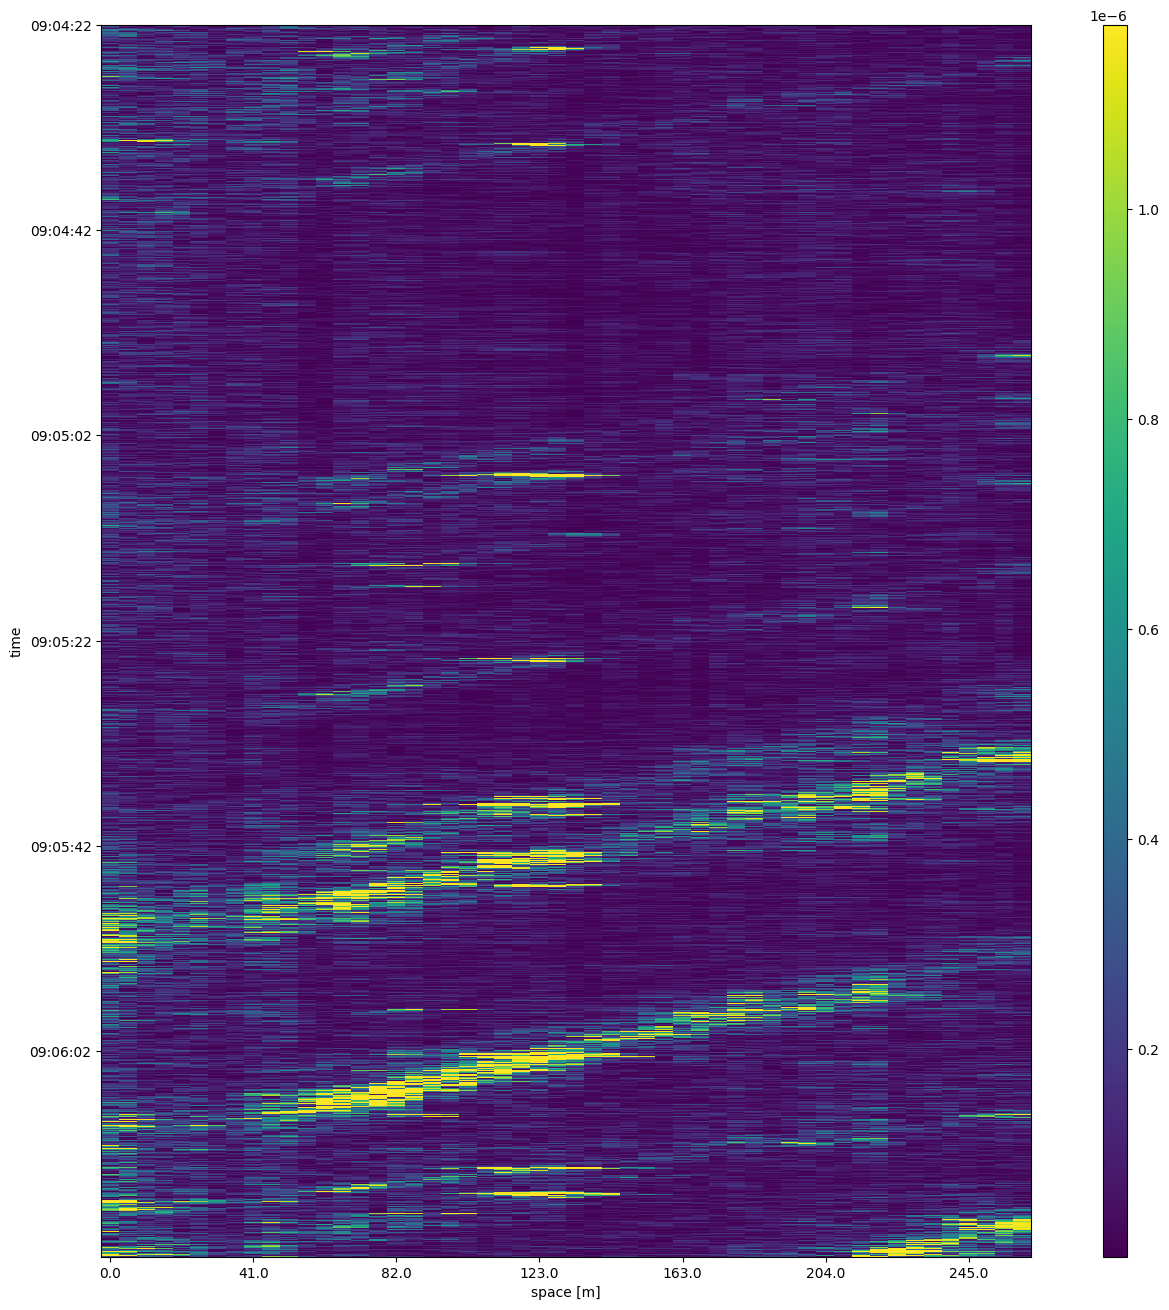

In [8]:


fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df1 -= df1.mean()
df1 = np.abs(df1) 
low, high = np.percentile(df1, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df1,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df1.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df1.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()


### 2nd Range : 091152 - 091342

In [9]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '091152'
end = '091342'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [10]:
data2 = []
first_filename = selected[0]
for file in selected:
   data2.append(np.load(file))
data2 = np.concatenate(data2)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data2), freq=f'{dt}s')
columns = np.arange(len(data2[0])) * dx
df2 = pd.DataFrame(data=data2, index=index, columns=columns)

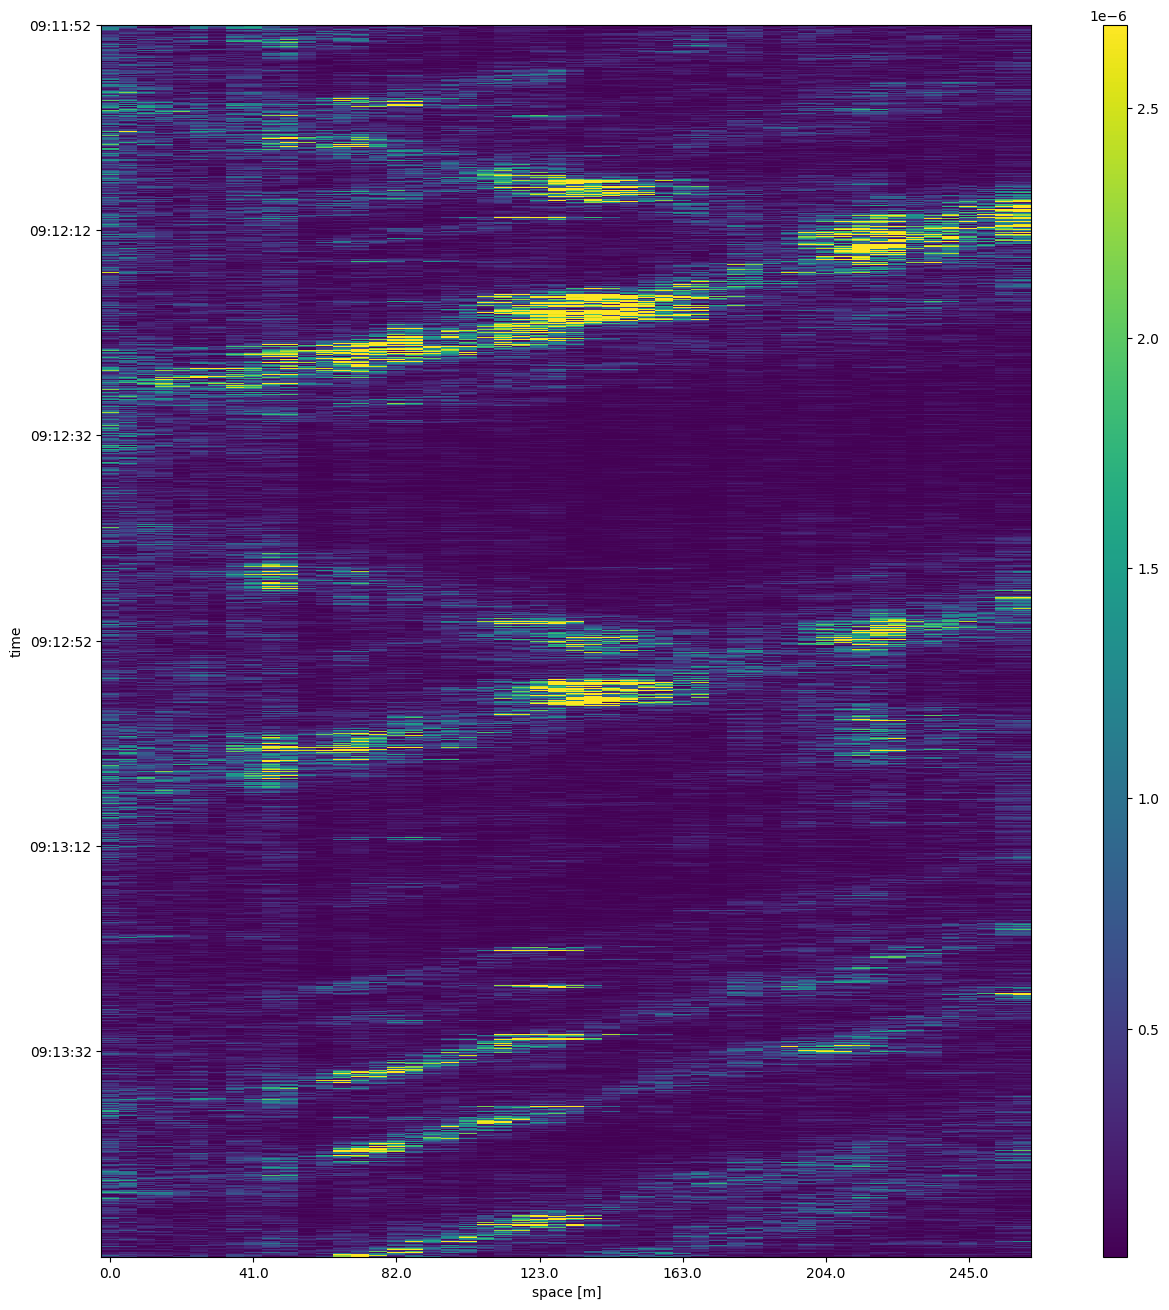

In [11]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df2 -= df2.mean()
df2 = np.abs(df2) 
low, high = np.percentile(df2, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df2,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df2.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df2.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()

### 3rd Range : 094122 - 094312

In [12]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '094122'
end = '094312'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [13]:
data3 = []
first_filename = selected[0]
for file in selected:
   data3.append(np.load(file))
data3 = np.concatenate(data3)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data3), freq=f'{dt}s')
columns = np.arange(len(data3[0])) * dx
df3 = pd.DataFrame(data=data3, index=index, columns=columns)

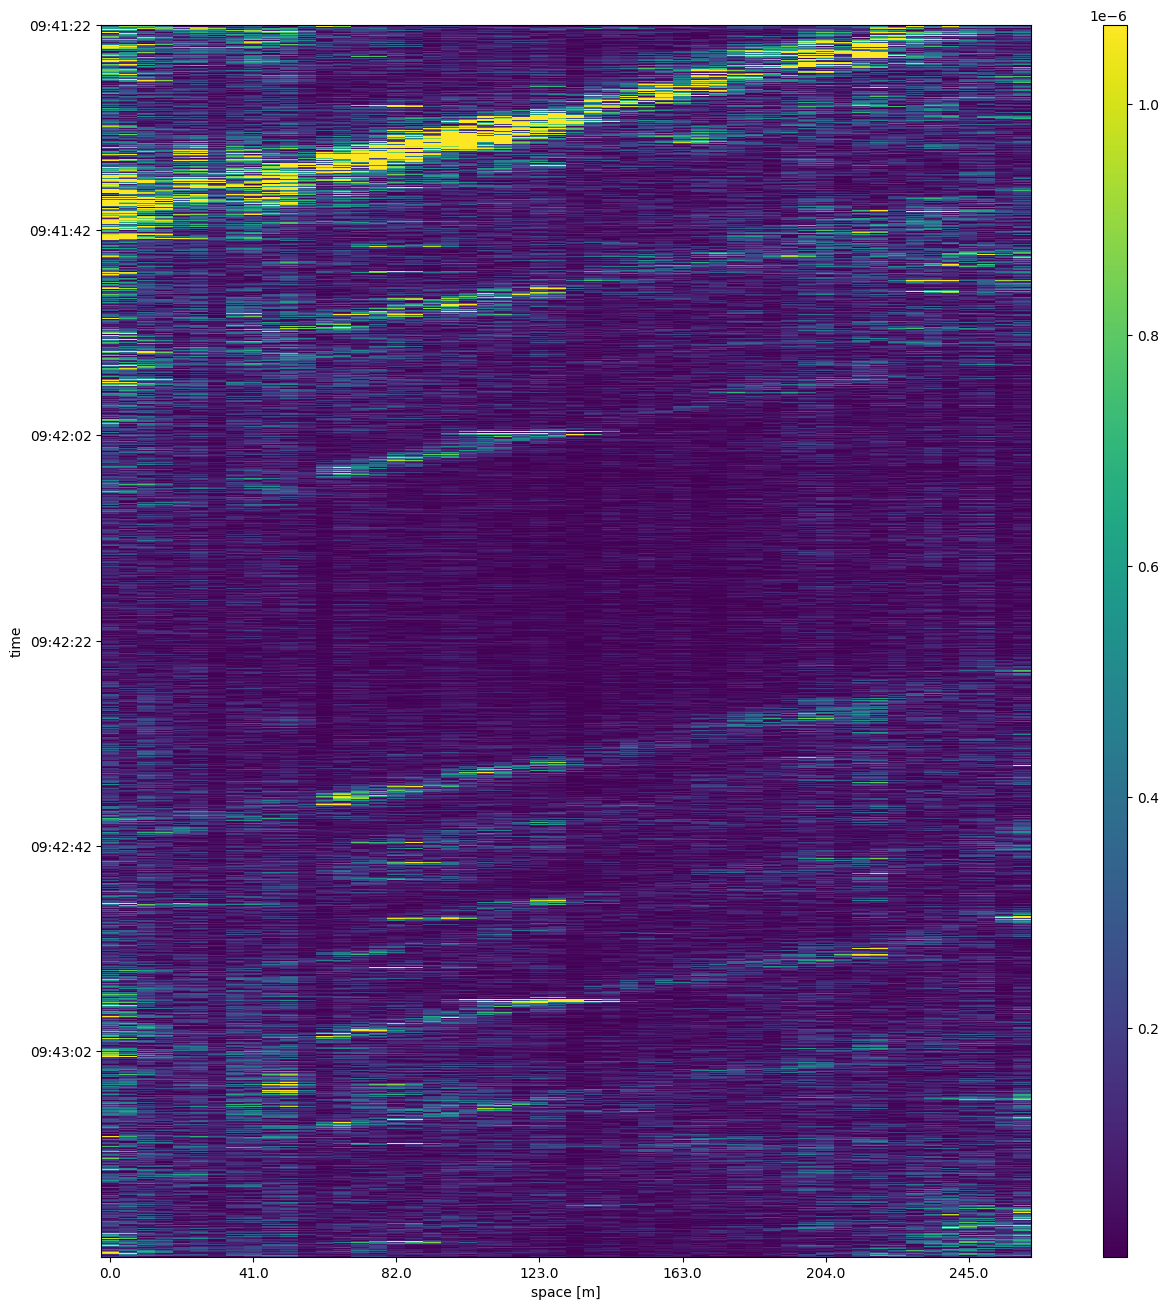

In [14]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df3 -= df3.mean()
df3 = np.abs(df3) 
low, high = np.percentile(df3, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df3,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df3.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df3.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()

In [15]:
os.makedirs('../images', exist_ok=True)

images_data = [
    (df1.values, 'range1_090422-090612.png'),
    (df2.values, 'range2_091152-091342.png'),
    (df3.values, 'range3_094122-094312.png')
]

for data, filename in images_data:
    low, high = np.percentile(data, [3, 99])
    norm = Normalize(vmin=low, vmax=high, clip=True)
    data_normalized = norm(data)
    
    cmap = plt.cm.viridis
    img_colored = (cmap(data_normalized)[:, :, :3] * 255).astype(np.uint8)
    img_colored_bgr = cv2.cvtColor(img_colored, cv2.COLOR_RGB2BGR)
    
    new_height = 1600
    new_width = int(new_height * 12 / 16)
    img_resized = cv2.resize(img_colored_bgr, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    
    cv2.imwrite(f'../images/{filename}', img_resized)
    print(f'✓ {filename}: {img_resized.shape}')

✓ range1_090422-090612.png: (1600, 1200, 3)
✓ range2_091152-091342.png: (1600, 1200, 3)
✓ range3_094122-094312.png: (1600, 1200, 3)


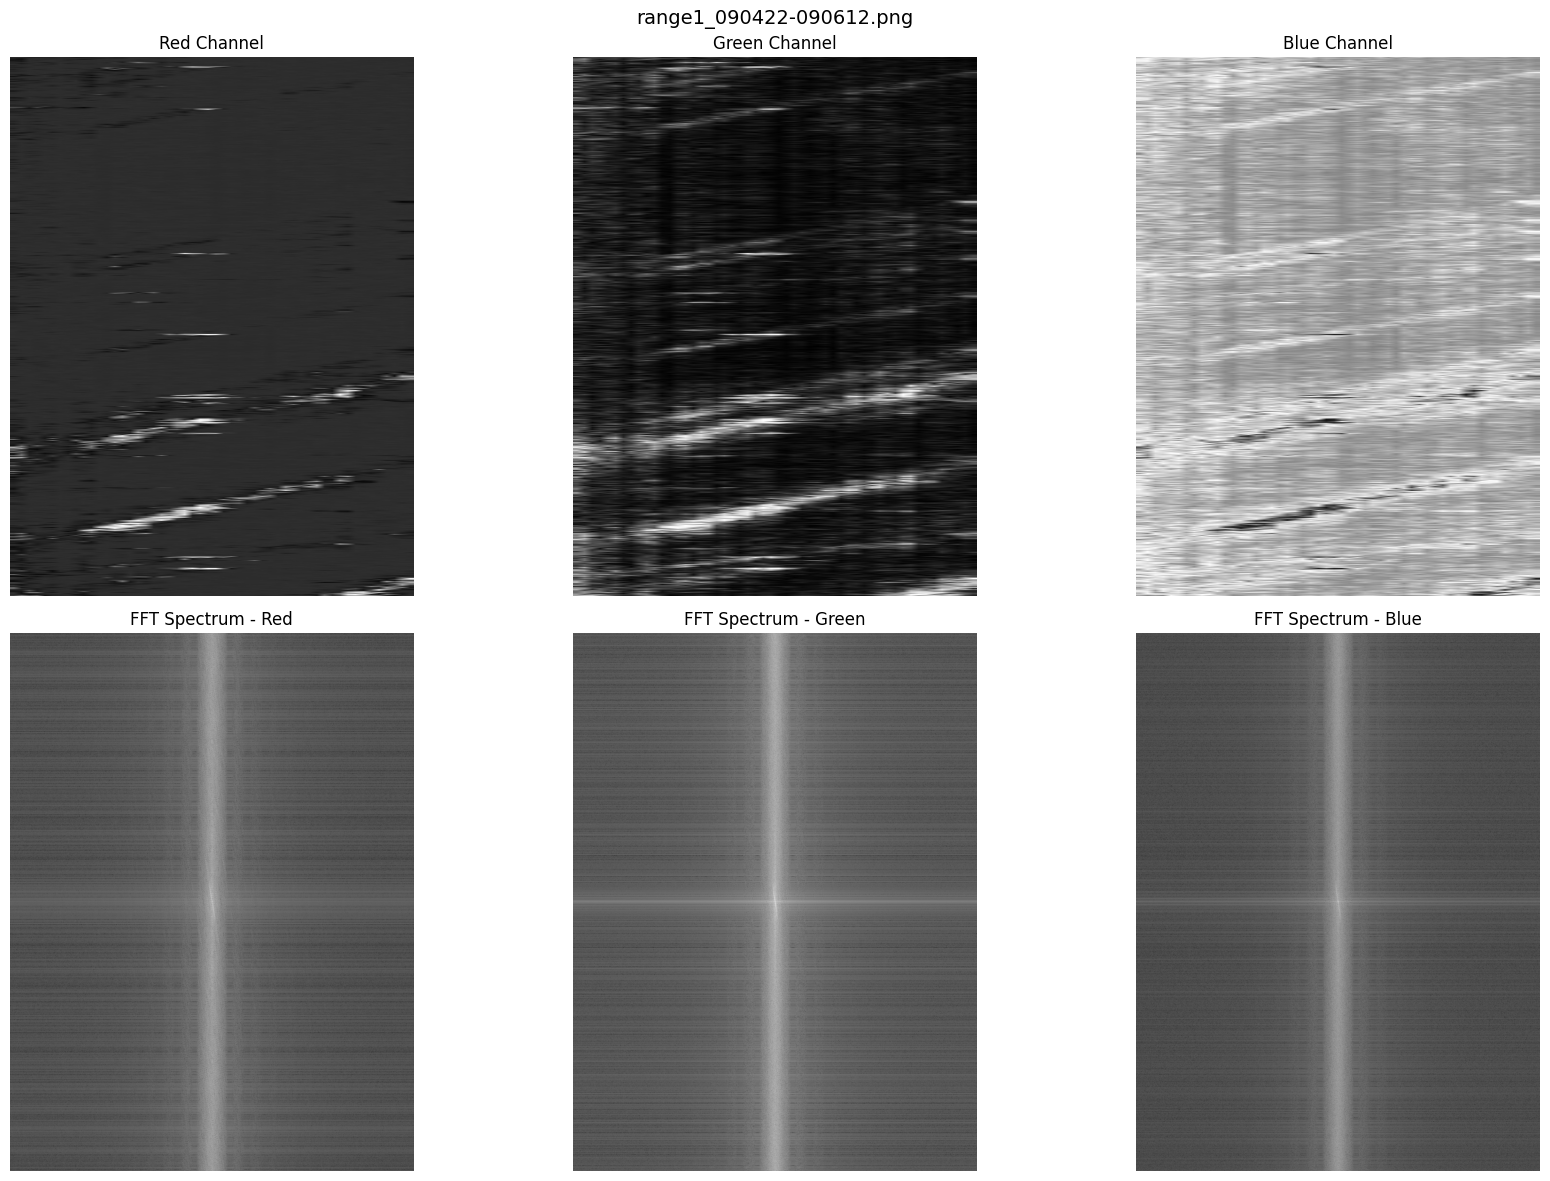

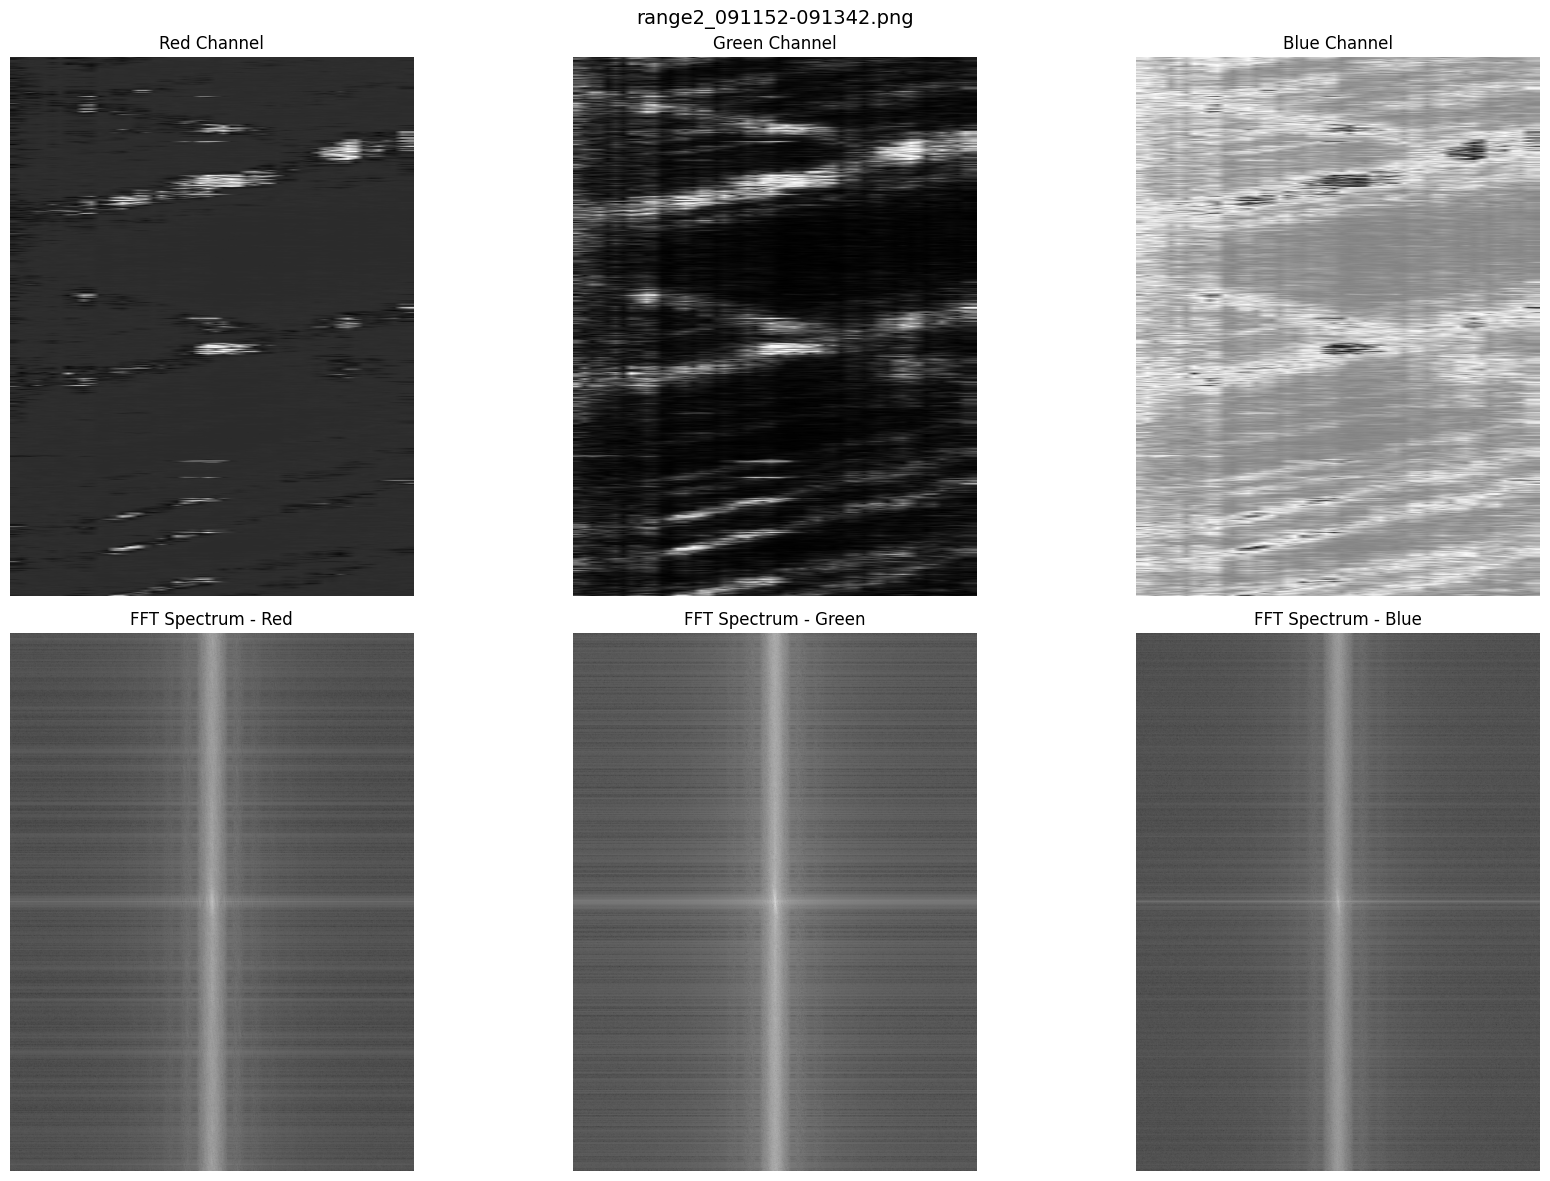

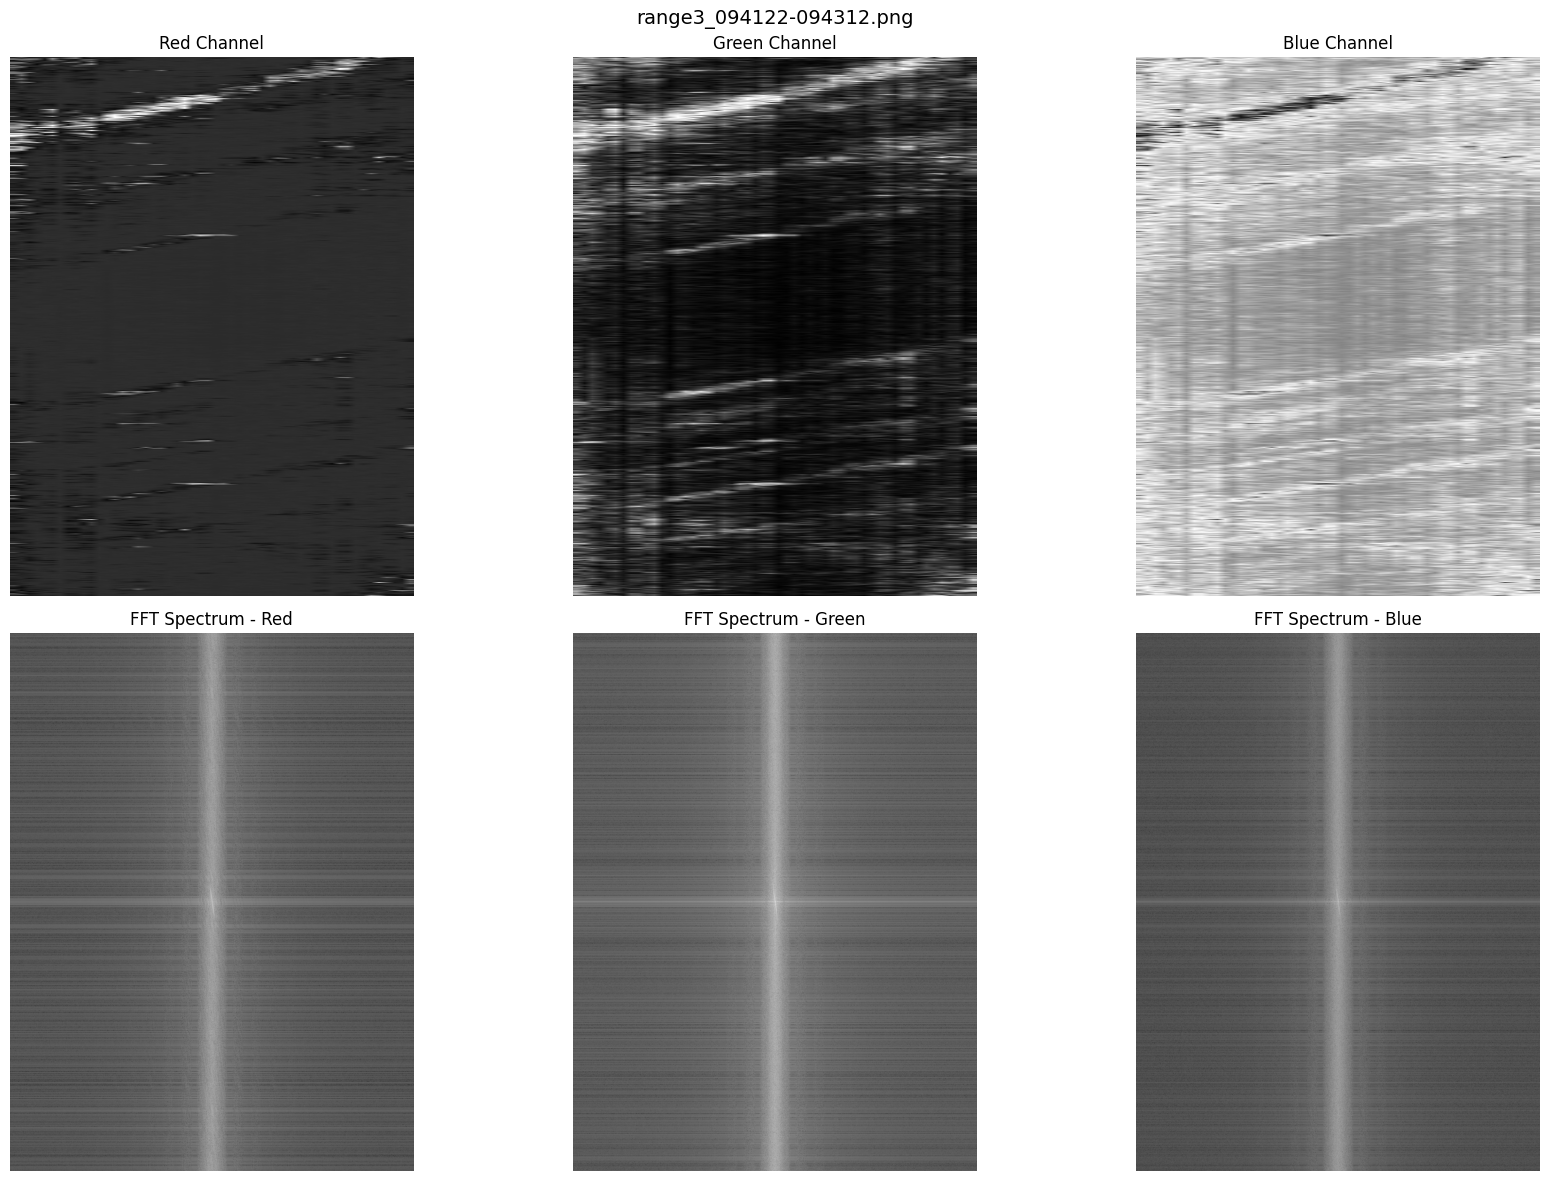

In [16]:
for filename in ['range1_090422-090612.png', 'range2_091152-091342.png', 'range3_094122-094312.png']:
    img = cv2.imread(f'../images/{filename}')
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    fft_channels = []
    magnitude_spectrums = []
    
    for i in range(3):
        channel = img_rgb[:, :, i].astype(np.float32)
        dft = cv2.dft(channel, flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)
        magnitude = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)
        magnitude_spectrums.append(magnitude)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    channel_names = ['Red', 'Green', 'Blue']
    for i in range(3):
        axes[0, i].imshow(img_rgb[:, :, i], cmap='gray')
        axes[0, i].set_title(f'{channel_names[i]} Channel')
        axes[0, i].axis('off')
        
        axes[1, i].imshow(magnitude_spectrums[i], cmap='gray')
        axes[1, i].set_title(f'FFT Spectrum - {channel_names[i]}')
        axes[1, i].axis('off')
    
    fig.suptitle(filename, fontsize=14)
    plt.tight_layout()
    plt.show()

### **FFT per DAS channel**

In [17]:
def plot_graph(plot_function, figsize=(8,4), title=None, x_label=None, y_label=None, 
               grid=True, tight=True, legend=False):
    plt.figure(figsize=figsize)
    plot_function()
    
    if title is not None:
        plt.title(title)
    
    if x_label is not None:
        plt.xlabel(x_label)
    
    if y_label is not None:
        plt.ylabel(y_label)
    
    plt.grid(grid)
    
    if (tight):
        plt.tight_layout()
    
    if (legend):
        plt.legend()
        
    plt.show()

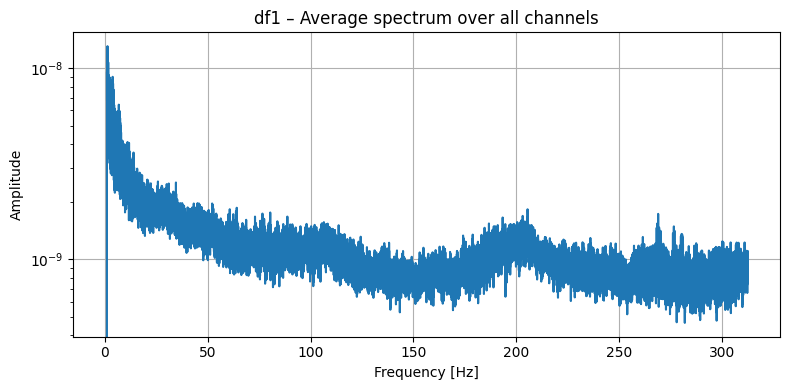

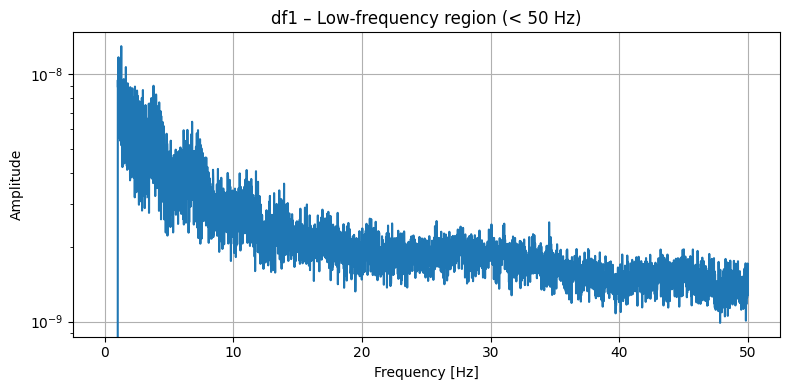

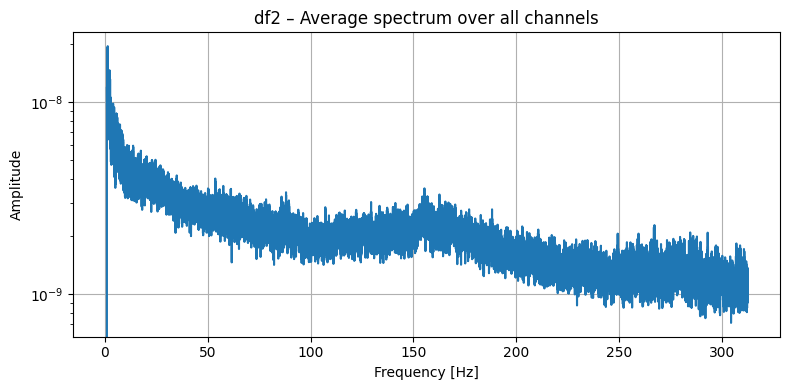

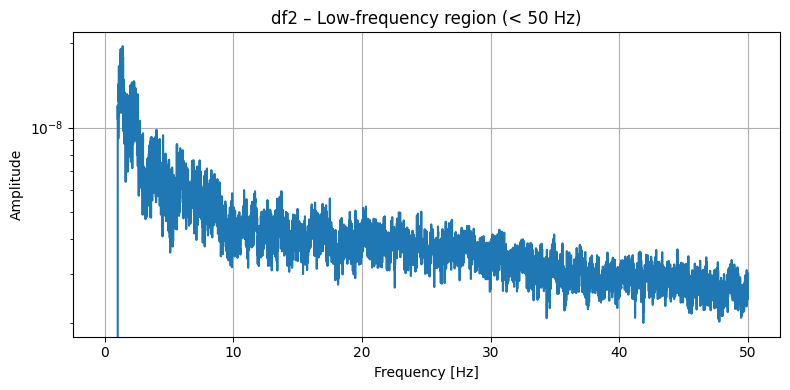

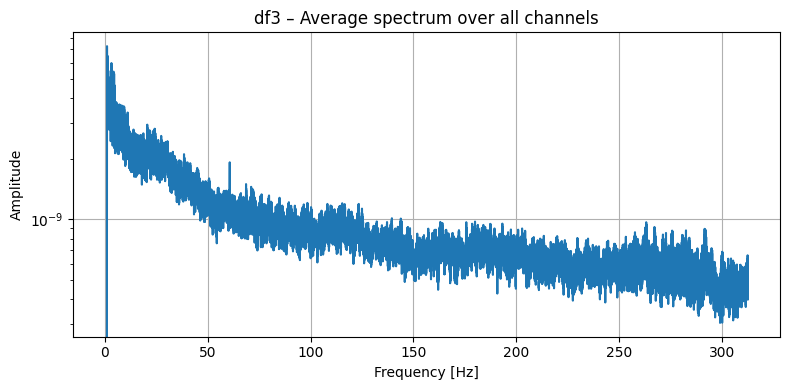

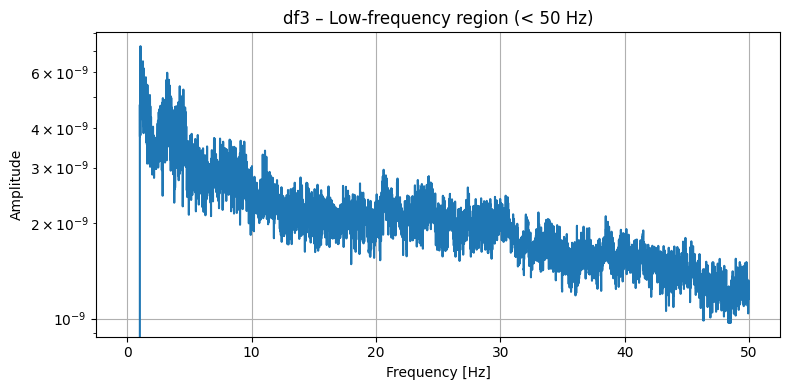

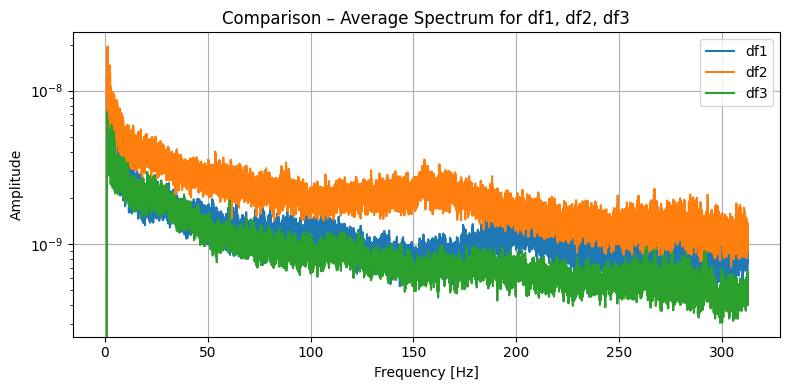

In [18]:
def compute_fft_for_segment(df, f_low = 0, dt=dt):
    data = df.values.astype(np.float64)
    T, C = data.shape
    
    # remove offset
    data -= data.mean(axis=0, keepdims=True)
    
    fft_vals = np.fft.rfft(data, axis=0)
    freqs = np.fft.rfftfreq(T, d=dt)
    
    mask = freqs >= f_low
    
    fft_vals_filtered = fft_vals.copy()
    fft_vals_filtered[~mask, :] = 0.0

    filtered_signal = np.fft.irfft(fft_vals_filtered, n=T, axis=0)

    fft_mag = np.abs(fft_vals_filtered) / (T / 2.0)

    return freqs, fft_mag, filtered_signal

results = {}

for name, df in [("df1", df1), ("df2", df2), ("df3", df3)]:
    freqs, fft_mag, _ = compute_fft_for_segment(df, f_low=1.0)
    results[name] = (freqs, fft_mag)
    
def plot_avg_spectrum(freqs, fft_mag):
    avg_spectrum = fft_mag.mean(axis=1)
    plt.semilogy(freqs, avg_spectrum)

def plot_avg_spectrum_low(freqs, fft_mag, f_max=50):
    avg_spectrum = fft_mag.mean(axis=1)
    mask = freqs < f_max
    plt.semilogy(freqs[mask], avg_spectrum[mask])
    
for name in ["df1", "df2", "df3"]:
    freqs, fft_mag = results[name]

    plot_graph(
        lambda: plot_avg_spectrum(freqs, fft_mag),
        title=f"{name} – Average spectrum over all channels",
        x_label="Frequency [Hz]",
        y_label="Amplitude"
    )

    plot_graph(
        lambda: plot_avg_spectrum_low(freqs, fft_mag, f_max=50),
        title=f"{name} – Low-frequency region (< 50 Hz)",
        x_label="Frequency [Hz]",
        y_label="Amplitude"
    )
    
plot_graph(
    lambda: [
        plt.semilogy(results[name][0], results[name][1].mean(axis=1), label=name)
        for name in ["df1", "df2", "df3"]
    ] or None,
    title="Comparison – Average Spectrum for df1, df2, df3",
    x_label="Frequency [Hz]",
    y_label="Amplitude",
    legend=True
)

### **Process Data**

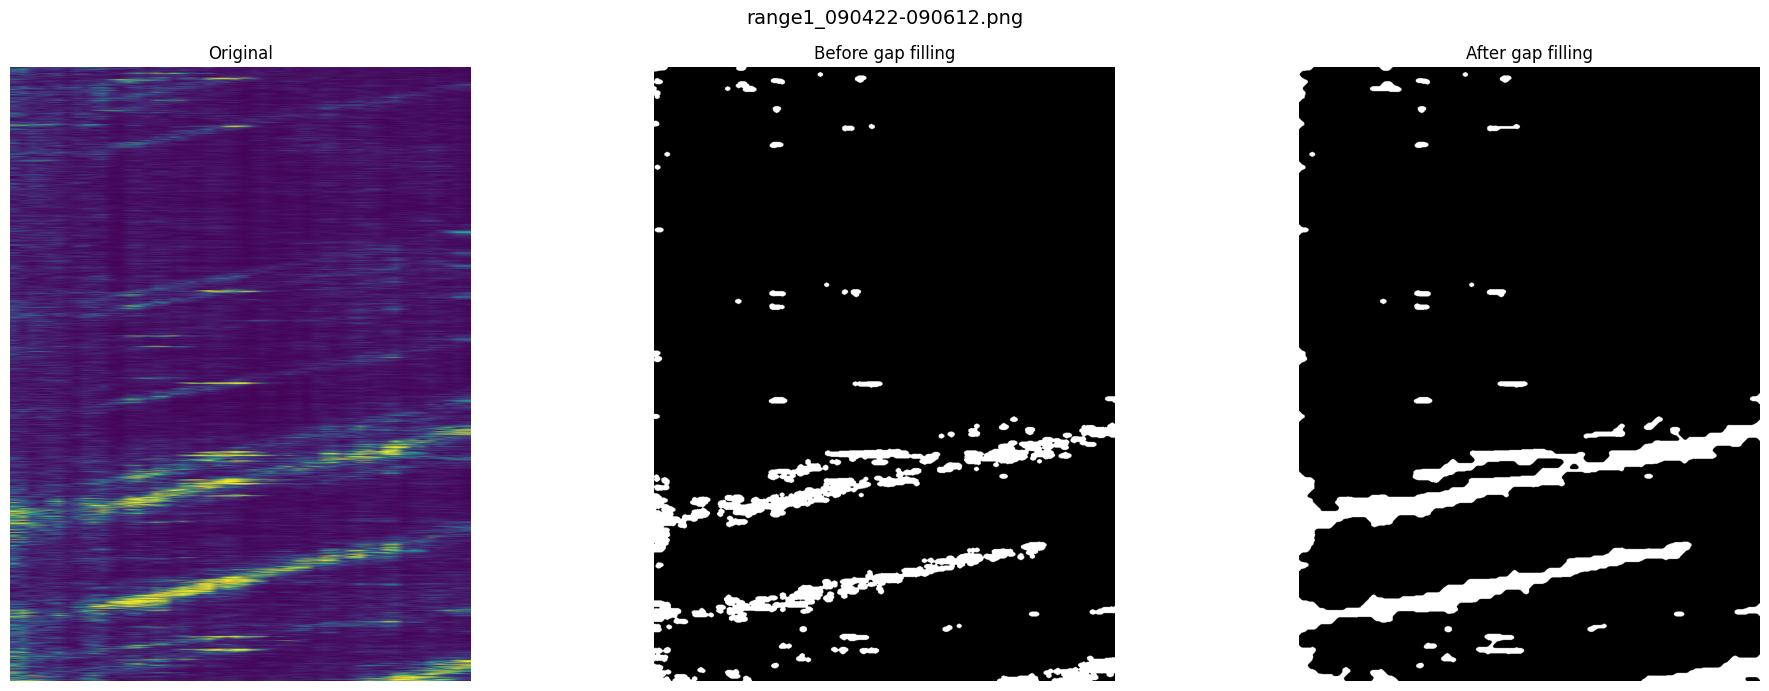

✓ Saved: filtered_range1_090422-090612.png


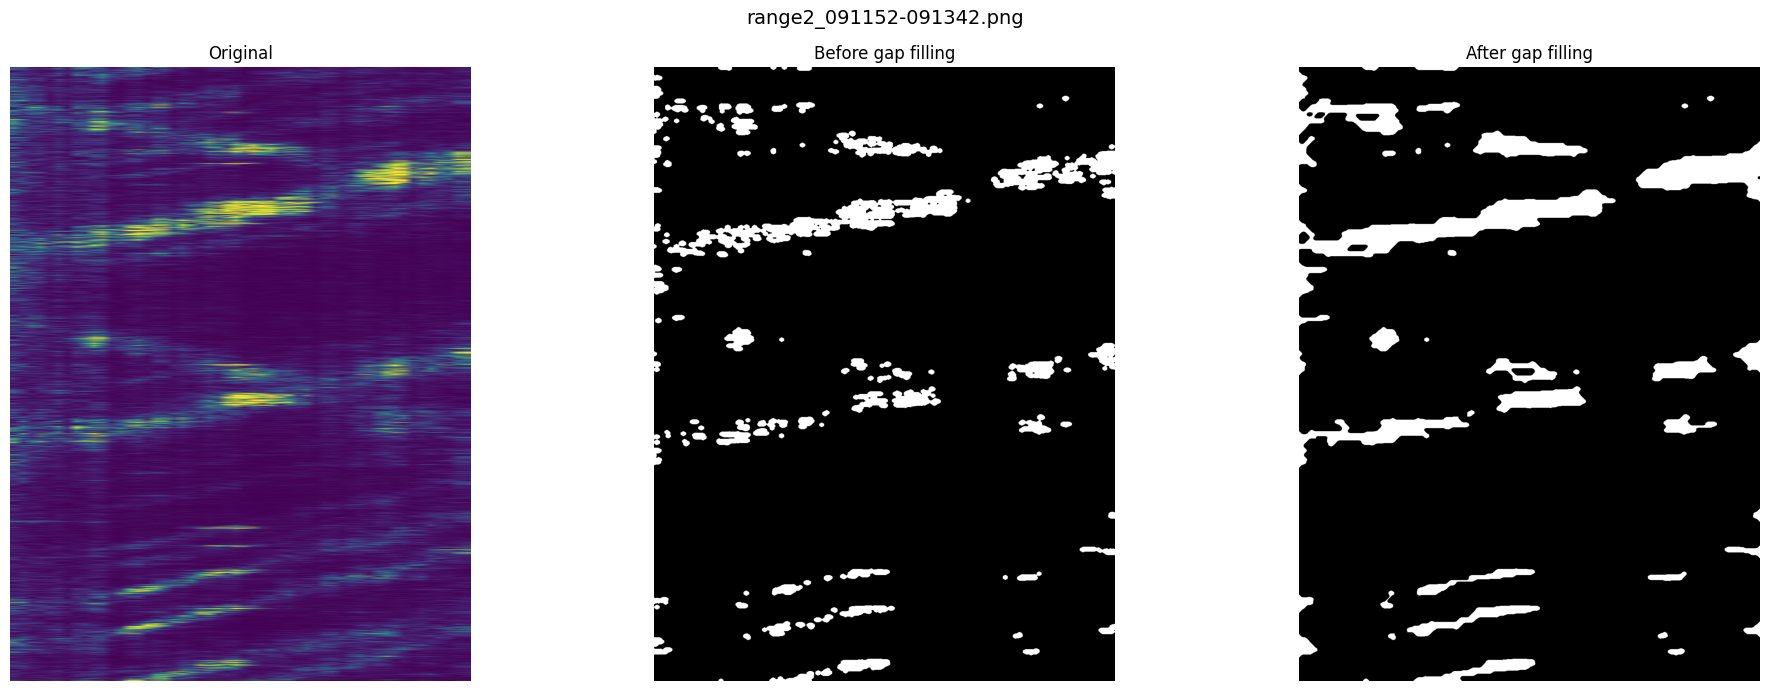

✓ Saved: filtered_range2_091152-091342.png


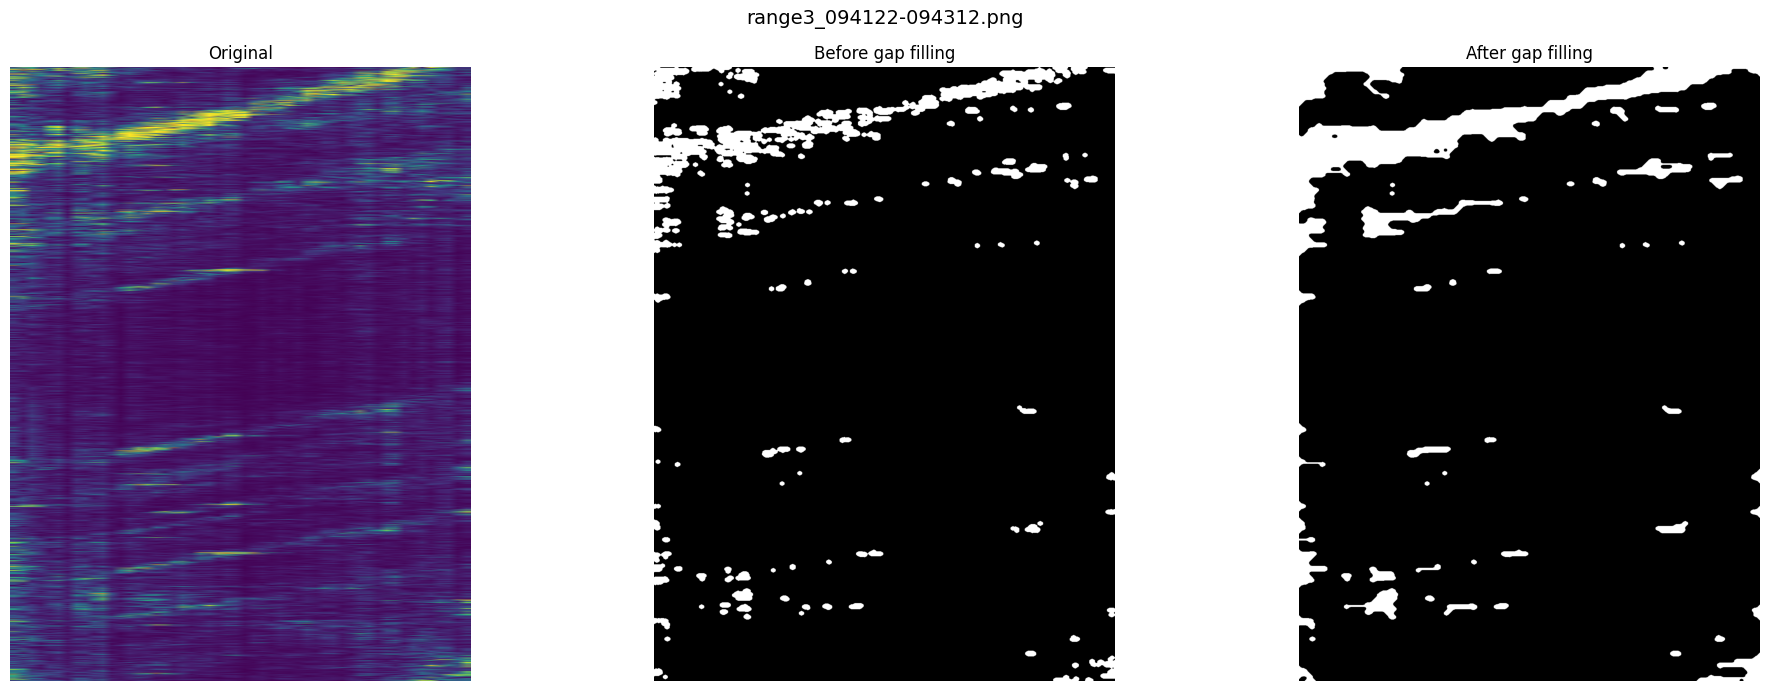

✓ Saved: filtered_range3_094122-094312.png


In [19]:
for filename in ['range1_090422-090612.png', 'range2_091152-091342.png', 'range3_094122-094312.png']:
    img = cv2.imread(f'../images/{filename}')
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    filtered_channels = []
    
    for i in range(3):
        channel = img_rgb[:, :, i].astype(np.float32)
        
        # 1. High-pass FFT filter to isolate details
        dft = cv2.dft(channel, flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)
        
        rows, cols = channel.shape
        crow, ccol = rows // 2, cols // 2

        mask = np.ones((rows, cols, 2), np.uint8)
        radius = min(rows, cols) // 8  # More selective filter
        cv2.circle(mask, (ccol, crow), radius, (0, 0), -1)
        
        fshift_filtered = dft_shift * mask
        
        f_ishift = np.fft.ifftshift(fshift_filtered)
        img_back = cv2.idft(f_ishift)
        img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
        
        img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        filtered_channels.append(img_back)
    
    img_filtered = np.stack(filtered_channels, axis=2)
    img_filtered_gray = cv2.cvtColor(img_filtered, cv2.COLOR_RGB2GRAY)
    
    # 2. Thresholding to keep only the most intense lines
    threshold_value = np.percentile(img_filtered_gray[img_filtered_gray > 0], 87)
    _, img_binary = cv2.threshold(img_filtered_gray, threshold_value, 255, cv2.THRESH_BINARY)
    
    # 3. Morphological operations: close -> open -> close with reinforced cleaning
    struct_small = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    struct_large = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    
    # First pass with small kernel to clean small impurities
    img_space_close = cv2.morphologyEx(img_binary, cv2.MORPH_CLOSE, struct_small)
    img_space_open = cv2.morphologyEx(img_space_close, cv2.MORPH_OPEN, struct_large, iterations=2)
    img_cleaned = cv2.morphologyEx(img_space_open, cv2.MORPH_CLOSE, struct_small)
    
    # 4. FILL GAPS IN LINES
    # Create oriented kernels to connect diagonal lines
    # Kernel for positive diagonal lines (/)
    kernel_diag_pos = np.array([[0, 0, 0, 0, 1],
                                 [0, 0, 0, 1, 0],
                                 [0, 0, 1, 0, 0],
                                 [0, 1, 0, 0, 0],
                                 [1, 0, 0, 0, 0]], dtype=np.uint8)
    
    # Kernel for negative diagonal lines (\)
    kernel_diag_neg = np.array([[1, 0, 0, 0, 0],
                                 [0, 1, 0, 0, 0],
                                 [0, 0, 1, 0, 0],
                                 [0, 0, 0, 1, 0],
                                 [0, 0, 0, 0, 1]], dtype=np.uint8)
    
    # Horizontal kernel to connect nearby points horizontally
    kernel_horiz = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 3))
    
    # Apply closing with diagonal kernels to fill gaps
    img_diag_pos = cv2.morphologyEx(img_cleaned, cv2.MORPH_CLOSE, kernel_diag_pos, iterations=4)
    img_diag_neg = cv2.morphologyEx(img_cleaned, cv2.MORPH_CLOSE, kernel_diag_neg, iterations=4)
    img_horiz = cv2.morphologyEx(img_cleaned, cv2.MORPH_CLOSE, kernel_horiz, iterations=3)
    
    # Combine all closings
    img_connected = cv2.bitwise_or(img_diag_pos, img_diag_neg)
    img_connected = cv2.bitwise_or(img_connected, img_horiz)
    
    # Final closing with an elliptical kernel to smooth
    kernel_final = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    img_final = cv2.morphologyEx(img_connected, cv2.MORPH_CLOSE, kernel_final, iterations=1)

    fig, axes = plt.subplots(1, 3, figsize=(20, 7))
    
    axes[0].imshow(img_rgb)
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    axes[1].imshow(img_cleaned, cmap='gray')
    axes[1].set_title('Before gap filling')
    axes[1].axis('off')
    
    axes[2].imshow(img_final, cmap='gray')
    axes[2].set_title('After gap filling')
    axes[2].axis('off')
    
    fig.suptitle(filename, fontsize=14)
    plt.tight_layout()
    plt.show()
    
    cv2.imwrite(f'../images/filtered_{filename}', img_final)
    print(f'✓ Saved: filtered_{filename}')


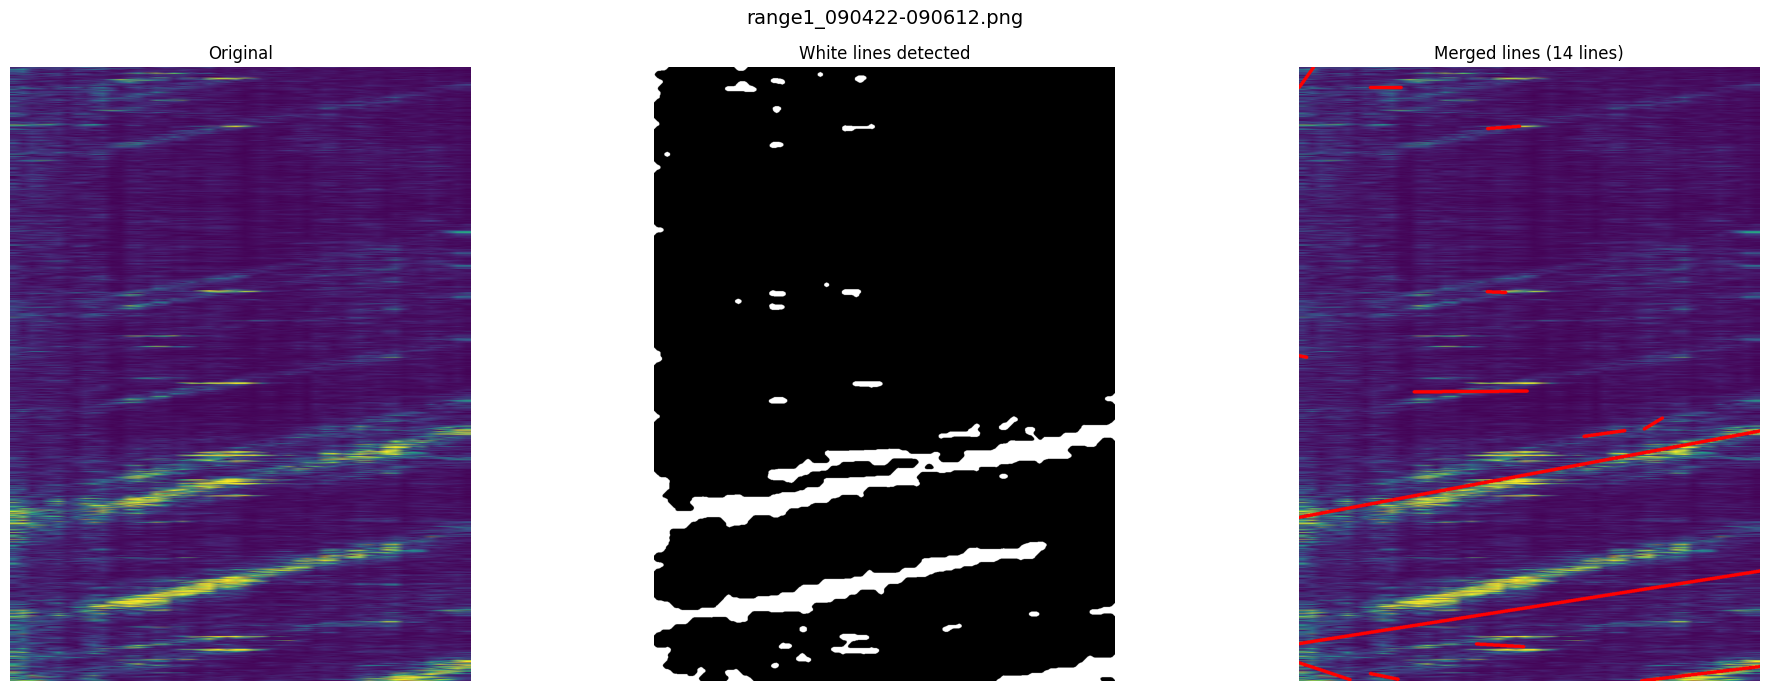

✓ Saved: lines_range1_090422-090612.png (14 merged lines)


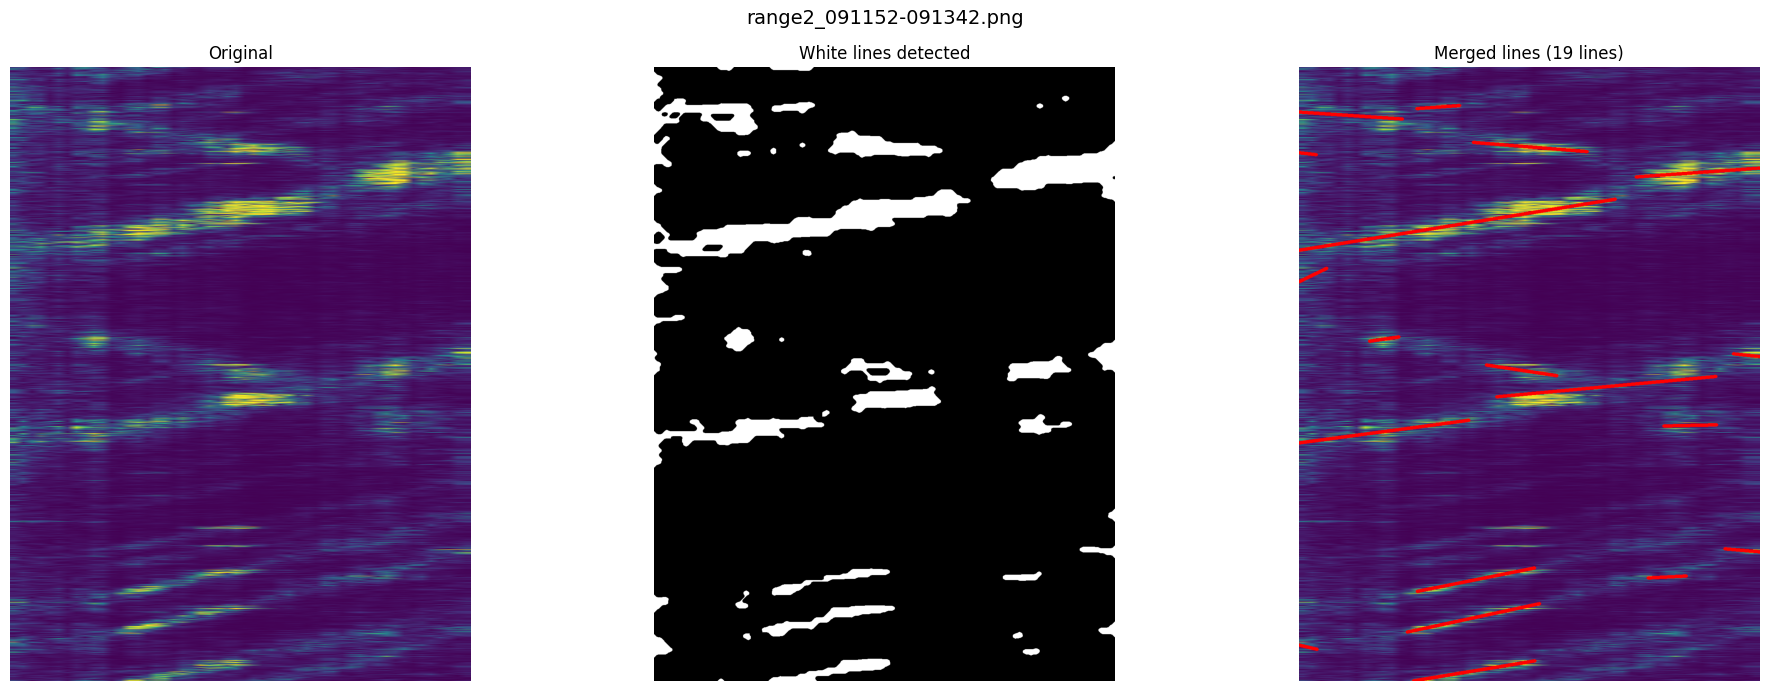

✓ Saved: lines_range2_091152-091342.png (19 merged lines)


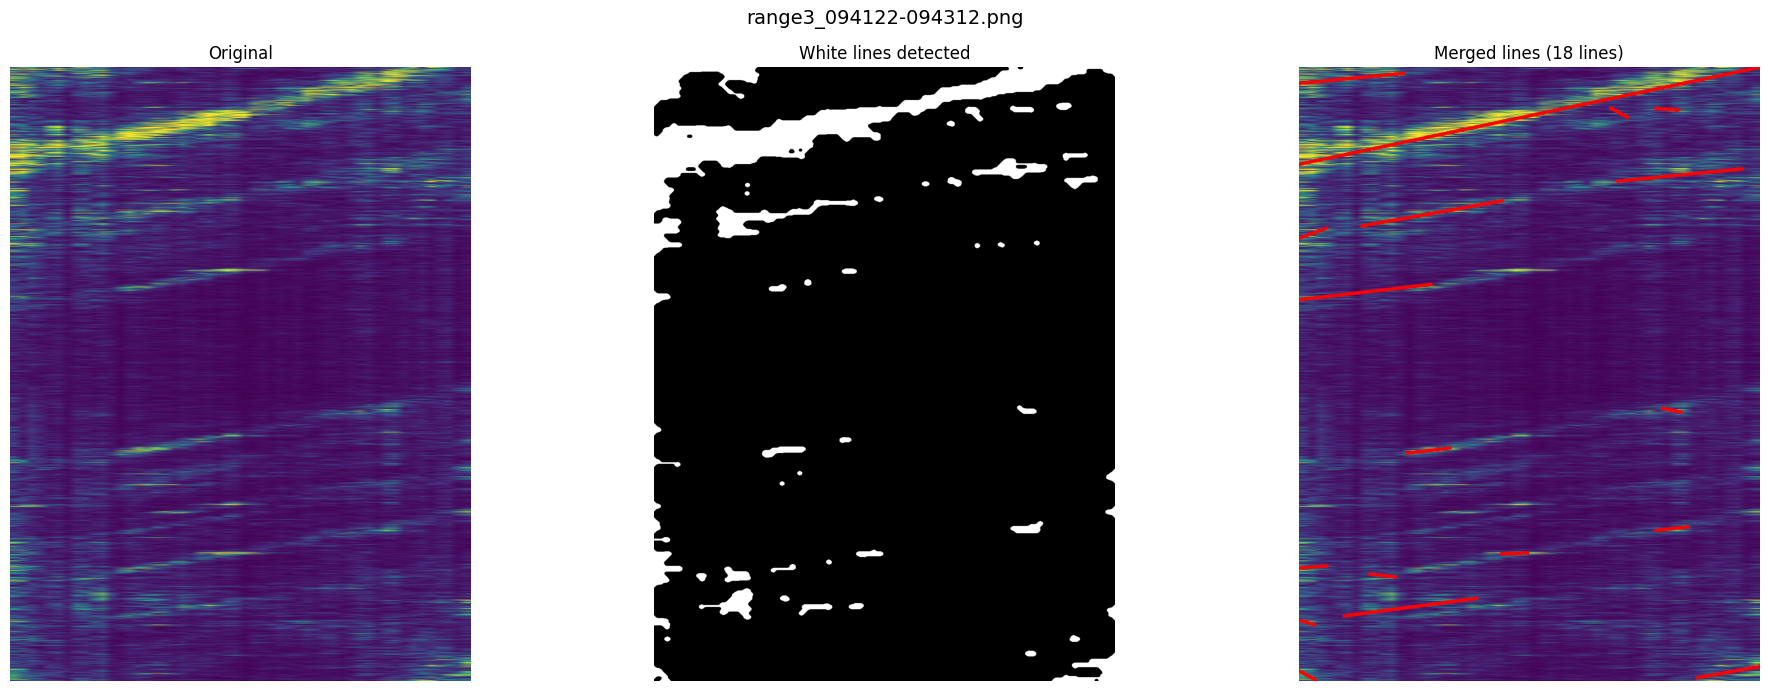

✓ Saved: lines_range3_094122-094312.png (18 merged lines)


In [50]:
for filename in ['range1_090422-090612.png', 'range2_091152-091342.png', 'range3_094122-094312.png']:
    # Load the original image and the filtered image
    img_original = cv2.imread(f'../images/{filename}')
    img_filtered = cv2.imread(f'../images/filtered_{filename}', cv2.IMREAD_GRAYSCALE)
    img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    
    # Find all white regions (connected components)
    num_labels, labels, component_stats, centroids = cv2.connectedComponentsWithStats(img_filtered, connectivity=8)
    
    # Create a copy to draw lines on
    img_with_lines = img_rgb.copy()
    
    # Calculate minimum area threshold
    areas = [component_stats[i, cv2.CC_STAT_AREA] for i in range(1, num_labels)]
    if len(areas) > 0:
        median_area = np.median(areas)
        min_area_threshold = median_area * 1.2
    else:
        min_area_threshold = 0
    
    # Collect all line segments
    lines = []
    
    for i in range(1, num_labels):
        area = component_stats[i, cv2.CC_STAT_AREA]
        if area < min_area_threshold:
            continue
        
        points = np.column_stack(np.where(labels == i))
        if len(points) < 2:
            continue
        
        y_coords = points[:, 0]
        x_coords = points[:, 1]
        
        try:
            coeffs = np.polyfit(x_coords, y_coords, 1)
            slope = coeffs[0]
            intercept = coeffs[1]
            
            x_min, x_max = int(x_coords.min()), int(x_coords.max())
            y_min = int(slope * x_min + intercept)
            y_max = int(slope * x_max + intercept)
            
            lines.append({
                'slope': slope,
                'intercept': intercept,
                'x_min': x_min,
                'x_max': x_max,
                'y_min': y_min,
                'y_max': y_max
            })
        except:
            continue
    
    # Simple merging: iteratively merge closest compatible lines
    merged = True
    while merged and len(lines) > 1:
        merged = False
        new_lines = []
        used = set()
        
        for i, line1 in enumerate(lines):
            if i in used:
                continue
            
            # Find the best match to merge with
            best_match = None
            best_distance = float('inf')
            
            for j, line2 in enumerate(lines):
                if i == j or j in used:
                    continue
                
                # Check slope similarity
                slope_diff = abs(line1['slope'] - line2['slope'])
                if slope_diff > 0.1:
                    continue
                
                # Calculate distance between line segments
                # Distance between endpoints
                dist1 = abs(line1['x_max'] - line2['x_min'])
                dist2 = abs(line2['x_max'] - line1['x_min'])
                x_distance = min(dist1, dist2)
                
                if x_distance > 300:
                    continue
                
                # Check vertical alignment
                y1_at_mid = line1['slope'] * ((line1['x_min'] + line1['x_max']) / 2) + line1['intercept']
                y2_at_mid = line2['slope'] * ((line2['x_min'] + line2['x_max']) / 2) + line2['intercept']
                y_distance = abs(y1_at_mid - y2_at_mid)
                
                if y_distance > 80:
                    continue
                
                # Total distance metric
                total_dist = x_distance + y_distance
                
                if total_dist < best_distance:
                    best_distance = total_dist
                    best_match = j
            
            # Merge if found a match
            if best_match is not None:
                line2 = lines[best_match]
                
                # Create merged line
                all_x_min = min(line1['x_min'], line2['x_min'])
                all_x_max = max(line1['x_max'], line2['x_max'])
                avg_slope = (line1['slope'] + line2['slope']) / 2
                avg_intercept = (line1['intercept'] + line2['intercept']) / 2
                
                new_lines.append({
                    'slope': avg_slope,
                    'intercept': avg_intercept,
                    'x_min': all_x_min,
                    'x_max': all_x_max,
                    'y_min': int(avg_slope * all_x_min + avg_intercept),
                    'y_max': int(avg_slope * all_x_max + avg_intercept)
                })
                
                used.add(i)
                used.add(best_match)
                merged = True
            else:
                new_lines.append(line1)
                used.add(i)
        
        lines = new_lines
    
    # Draw final lines
    for line in lines:
        y_min = max(0, min(img_rgb.shape[0] - 1, line['y_min']))
        y_max = max(0, min(img_rgb.shape[0] - 1, line['y_max']))
        
        cv2.line(img_with_lines, (line['x_min'], y_min), (line['x_max'], y_max), (255, 0, 0), 8)
    
    # Display results
    fig, axes = plt.subplots(1, 3, figsize=(20, 7))
    
    axes[0].imshow(img_rgb)
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    axes[1].imshow(img_filtered, cmap='gray')
    axes[1].set_title('White lines detected')
    axes[1].axis('off')
    
    axes[2].imshow(img_with_lines)
    axes[2].set_title(f'Merged lines ({len(lines)} lines)')
    axes[2].axis('off')
    
    fig.suptitle(filename, fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Save result
    output_path = f'../images/lines_{filename}'
    cv2.imwrite(output_path, cv2.cvtColor(img_with_lines, cv2.COLOR_RGB2BGR))
    print(f'✓ Saved: lines_{filename} ({len(lines)} merged lines)')